In [46]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from MCForecastTools import MCSimulation
from MCForecastTools import MCSimulation



%matplotlib inline

In [47]:
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

True

In [48]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [49]:
# Tickers
ticker = ["BAB", "SPY"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data 
bab_spy_df = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
bab_spy_df.head(10)

BAB                                        SPY  \
                            open     high      low  close    volume    open   
time                                                                          
2017-06-01 00:00:00-04:00  28.58  30.0000  28.5600  28.61   96381.0     NaN   
2017-06-02 00:00:00-04:00  28.64  30.1500  28.6000  28.69   84594.0     NaN   
2017-06-05 00:00:00-04:00  28.72  30.1300  28.7100  30.04   81492.0  243.98   
2017-06-06 00:00:00-04:00  30.15  30.1800  30.1101  30.15   95869.0  243.31   
2017-06-07 00:00:00-04:00  30.11  30.1600  28.6900  28.69   98006.0  243.60   
2017-06-08 00:00:00-04:00  28.70  30.0600  28.6200  28.67   72727.0  243.77   
2017-06-09 00:00:00-04:00  28.59  30.0290  28.5800  28.62  136939.0  244.09   
2017-06-12 00:00:00-04:00  28.60  30.0415  28.5700  29.99   72327.0  243.14   
2017-06-13 00:00:00-04:00  29.96  30.0200  29.9300  30.01  163720.0  243.99   
2017-06-14 00:00:00-04:00  30.18  30.2300  30.1010  30.16   92105.0  244.86   

                                                                   
                             high       low    close       volume  
time                                                               
2017-06-01 00:00:00-04:00     NaN       NaN      NaN          NaN  
2017-06-02 00:00:00-04:00     NaN       NaN      NaN          NaN  
2017-06-05 00:00:00-04:00  244.30  243.7600  243.965   27596403.0  
2017-06-06 00:00:00-04:00  243.98  243.1200  243.250   36562468.0  
2017-06-07 00:00:00-04:00  243.92  242.8300  243.650   38602639.0  
2017-06-08 00:00:00-04:00  244.33  243.1700  243.760   48051333.0  
2017-06-09 00:00:00-04:00  245.01  241.9500  243.450  103578275.0  
2017-06-12 00:00:00-04:00  243.42  242.3800  243.340   57096569.0  
2017-06-13 00:00:00-04:00  244.61  243.5799  244.520   43470532.0  
2017-06-14 00:00:00-04:00  244.87  243.2900  244.260   55098826.0

In [50]:
bab_spy_df.isnull().sum()

BAB  open      2
     high      2
     low       2
     close     2
     volume    2
SPY  open      2
     high      2
     low       2
     close     2
     volume    2
dtype: int64

In [51]:
df = bab_spy_df.dropna()

df.isnull().sum()

BAB  open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [52]:
df.tail()

BAB                                        SPY  \
                            open     high      low  close    volume    open   
time                                                                          
2021-05-18 00:00:00-04:00  32.37  32.4400  32.3600  32.38  151761.0  415.80   
2021-05-19 00:00:00-04:00  32.44  32.5000  32.2600  32.30  161975.0  406.92   
2021-05-20 00:00:00-04:00  32.41  32.5000  32.3631  32.47  128438.0  411.80   
2021-05-21 00:00:00-04:00  32.50  32.5563  32.4300  32.47  294391.0  416.87   
2021-05-24 00:00:00-04:00  32.56  32.5700  32.4400  32.47  205300.0  417.34   

                                                                 
                              high      low   close      volume  
time                                                             
2021-05-18 00:00:00-04:00  416.060  411.770  411.99  52318555.0  
2021-05-19 00:00:00-04:00  411.050  405.335  410.90  94165741.0  
2021-05-20 00:00:00-04:00  416.625  411.670  415.24  69408898.0  
2021-05-21 00:00:00-04:00  418.200  414.450  414.95  66355670.0  
2021-05-24 00:00:00-04:00  420.320  417.080  419.12  45510571.0

In [53]:
# Create and empty DataFrame for closing prices
bab_spy_closing_prices = pd.DataFrame()

# Fetch the closing prices 
bab_spy_closing_prices["BAB"] = bab_spy_df["BAB"]["close"]
bab_spy_closing_prices["SPY"] = bab_spy_df["SPY"]["close"]

# Drop the time component of the date
bab_spy_closing_prices.index = bab_spy_closing_prices.index.date

# Compute daily returns
bab_spy_returns = bab_spy_closing_prices.pct_change().dropna()

# Display sample data
bab_spy_returns.tail()

,BAB,SPY
2021-05-18,-0.001542,-0.008543
2021-05-19,-0.002471,-0.002646
2021-05-20,0.005263,0.010562
2021-05-21,0.000000,-0.000698
2021-05-24,0.000000,0.010049


In [54]:
bab_spy_returns.describe()

,BAB,SPY
count,999.000000,999.000000
mean,0.000127,0.000629
std,0.009787,0.013136
min,-0.129493,-0.116340
25%,-0.002076,-0.003428
50%,0.000333,0.000903
75%,0.002705,0.006310
max,0.081749,0.094737


In [55]:
bab_spy_closing_prices.describe()

,BAB,SPY
count,1000.000000,1000.000000
mean,31.028179,299.073941
std,1.604590,43.793471
min,25.010000,222.510000
25%,29.560000,269.122500
50%,30.710000,287.560000
75%,32.510000,322.020000
max,34.710000,422.090000


<AxesSubplot:ylabel='Frequency'>

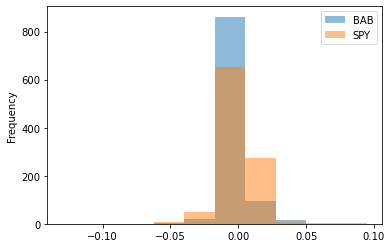

In [56]:
bab_spy_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

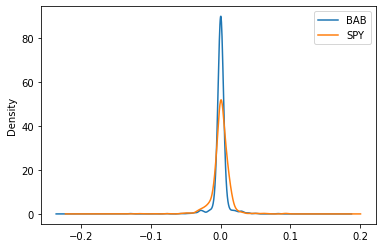

In [57]:
bab_spy_returns.plot.density()

<AxesSubplot:>

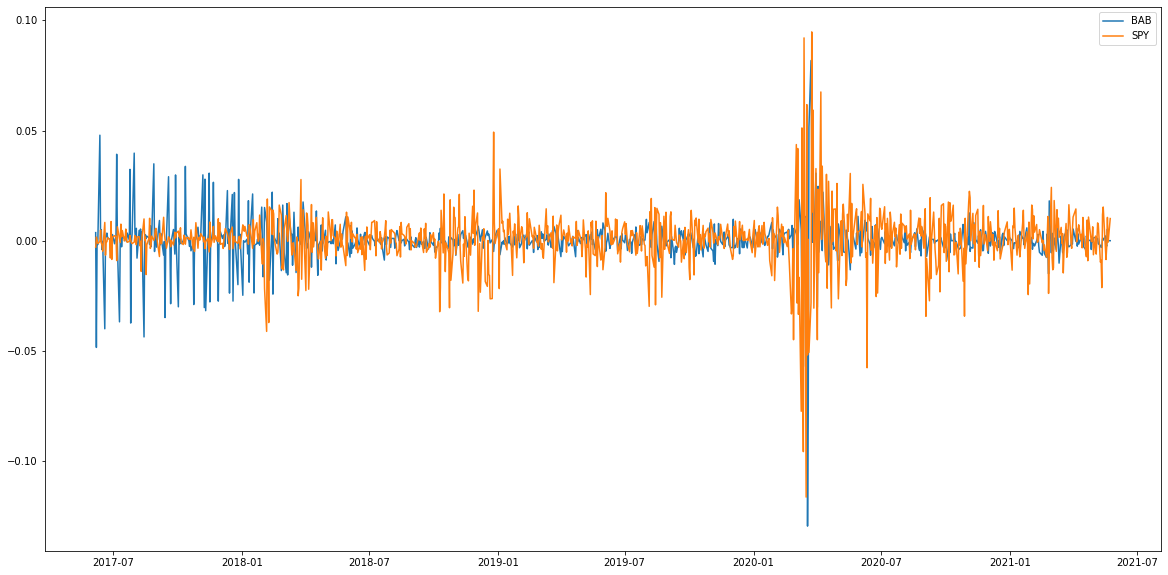

In [58]:
bab_spy_returns.plot(figsize = (20,10))

Text(0.5, 0, 'Date')

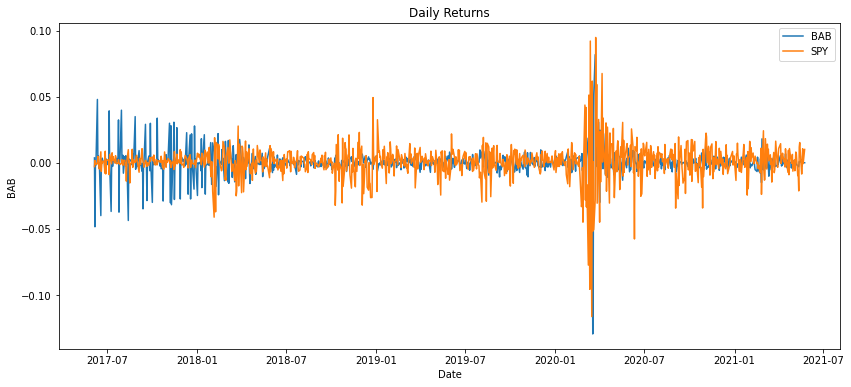

In [59]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Returns")

# Line chart showing daily returns
sns.lineplot(data=bab_spy_returns['BAB'], label="BAB")

# Line chart showing daily returns
sns.lineplot(data=bab_spy_returns['SPY'], label="SPY")

# Add label for horizontal axis
plt.xlabel("Date")


<AxesSubplot:title={'center':'Cumulative Returns'}>

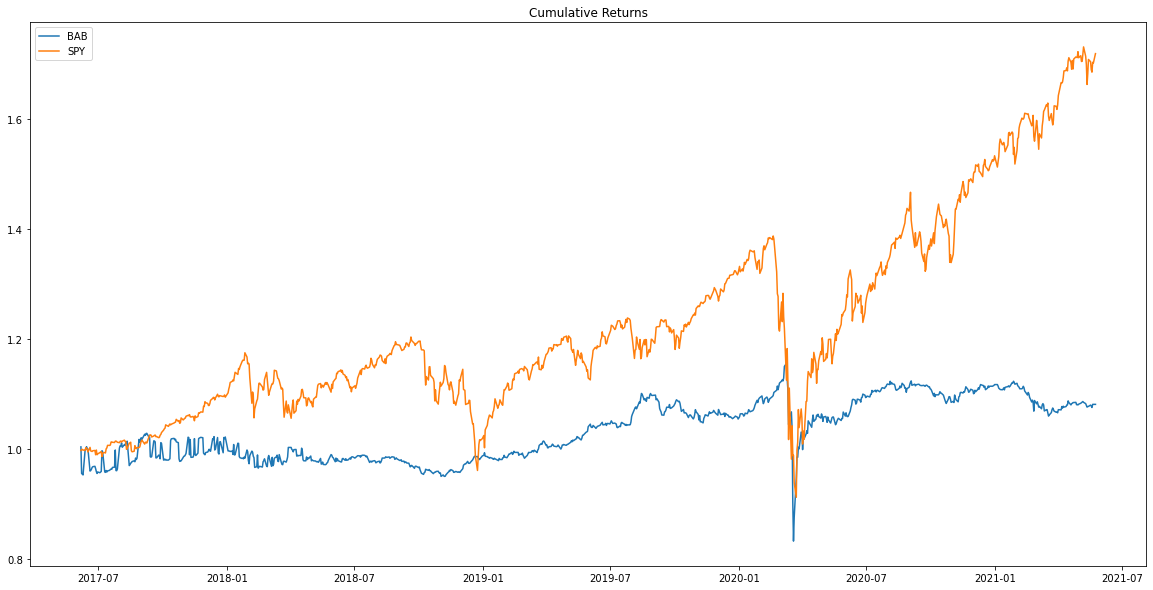

In [60]:
# Calculate Cumulative Returns
bab_spy_cumulative_returns = (1 + bab_spy_returns).cumprod()

# Plot Cumulative Returns
bab_spy_cumulative_returns.plot(title = "Cumulative Returns", figsize = (20,10) )

In [63]:
# Calculate Standard Deviation
bab_spy_std = bab_spy_returns.std()

# Calculate Annual Standard Deviation
bab_spy_annual_std = bab_spy_std * np.sqrt(252)

# Display Standard Deviation
bab_spy_annual_std

BAB    0.155361
SPY    0.208529
dtype: float64

In [68]:
# Calculate Covariance
bab_spy_covar = bab_spy_returns['BAB'].rolling(window = 60).cov(bab_spy_returns['SPY'])
# Display Covariance
bab_spy_covar

2017-06-06         NaN
2017-06-07         NaN
2017-06-08         NaN
2017-06-09         NaN
2017-06-12         NaN
                ...   
2021-05-18    0.000009
2021-05-19    0.000009
2021-05-20    0.000010
2021-05-21    0.000004
2021-05-24    0.000006
Length: 999, dtype: float64

In [74]:
# Calculate Variance
bab_spy_var = bab_spy_returns['SPY'].rolling(window = 60).var()
# Display Variance
bab_spy_var

2017-06-06        NaN
2017-06-07        NaN
2017-06-08        NaN
2017-06-09        NaN
2017-06-12        NaN
               ...   
2021-05-18    0.00009
2021-05-19    0.00009
2021-05-20    0.00009
2021-05-21    0.00008
2021-05-24    0.00008
Name: SPY, Length: 999, dtype: float64

In [75]:
# Calculate Beta
bab_beta = bab_spy_covar / bab_spy_var

# Sisplay Beta
bab_beta

2017-06-06         NaN
2017-06-07         NaN
2017-06-08         NaN
2017-06-09         NaN
2017-06-12         NaN
                ...   
2021-05-18    0.096741
2021-05-19    0.098131
2021-05-20    0.114031
2021-05-21    0.048386
2021-05-24    0.074588
Length: 999, dtype: float64

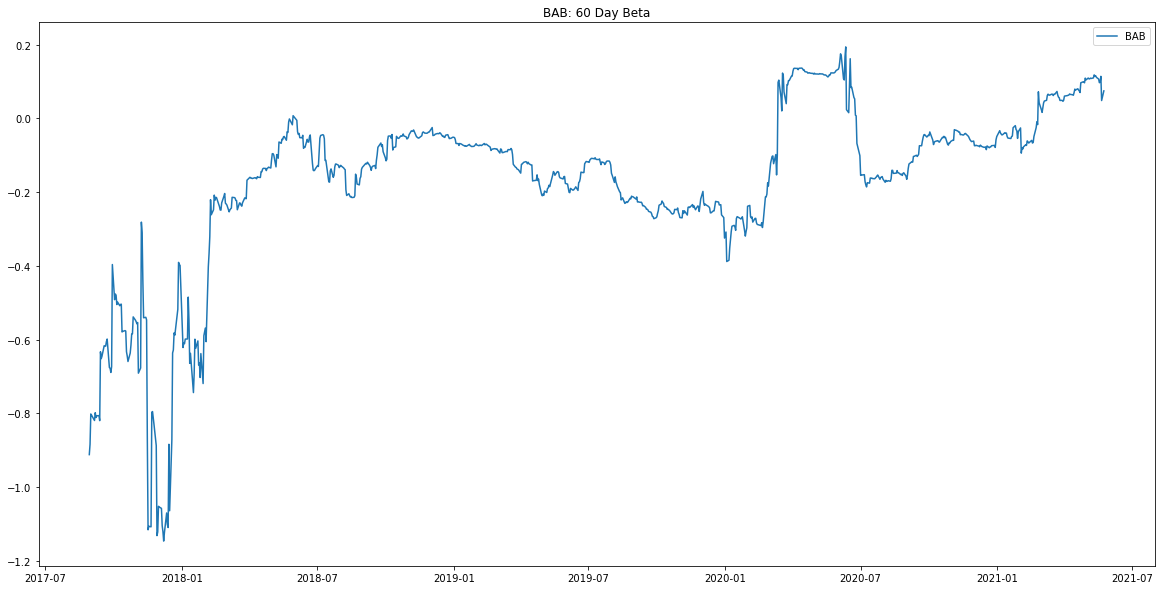

In [77]:
# Plot Beta
bab_beta_plot = bab_beta.plot(title= "BAB: 60 Day Beta", figsize=(20, 10))
bab_beta_plot.legend(["BAB"])

In [69]:
# Calculate the Sharpe Ratio
bab_spy_sratio = (bab_spy_returns.mean() * 252) / (bab_spy_returns.std() * np.sqrt(252))
bab_spy_sratio

BAB    0.205280
SPY    0.759692
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

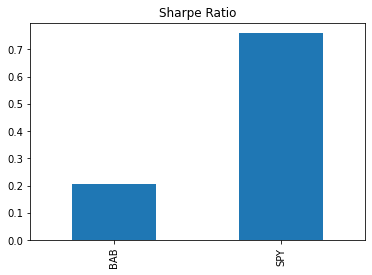

In [70]:
# Plot Sharpe Ratio
bab_spy_sratio.plot(kind = "bar", title = "Sharpe Ratio")

In [83]:
# Tickers
ticker2 = ["BAB"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data
bab_df = alpaca.get_barset(  
    ticker2,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
bab_df.head(10)

BAB                                 
                            open     high      low  close  volume
time                                                             
2017-06-01 00:00:00-04:00  28.58  30.0000  28.5600  28.61   96381
2017-06-02 00:00:00-04:00  28.64  30.1500  28.6000  28.69   84594
2017-06-05 00:00:00-04:00  28.72  30.1300  28.7100  30.04   81492
2017-06-06 00:00:00-04:00  30.15  30.1800  30.1101  30.15   95869
2017-06-07 00:00:00-04:00  30.11  30.1600  28.6900  28.69   98006
2017-06-08 00:00:00-04:00  28.70  30.0600  28.6200  28.67   72727
2017-06-09 00:00:00-04:00  28.59  30.0290  28.5800  28.62  136939
2017-06-12 00:00:00-04:00  28.60  30.0415  28.5700  29.99   72327
2017-06-13 00:00:00-04:00  29.96  30.0200  29.9300  30.01  163720
2017-06-14 00:00:00-04:00  30.18  30.2300  30.1010  30.16   92105

In [110]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker2,
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_fiveyear.portfolio_data.head()

BAB                                           
                            open   high      low  close volume daily_return
time                                                                       
2017-06-01 00:00:00-04:00  28.58  30.00  28.5600  28.61  96381          NaN
2017-06-02 00:00:00-04:00  28.64  30.15  28.6000  28.69  84594     0.002796
2017-06-05 00:00:00-04:00  28.72  30.13  28.7100  30.04  81492     0.047055
2017-06-06 00:00:00-04:00  30.15  30.18  30.1101  30.15  95869     0.003662
2017-06-07 00:00:00-04:00  30.11  30.16  28.6900  28.69  98006    -0.048425

In [111]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009090,1.002086,1.002155,0.991717,0.989857,1.021406,0.998146,0.995663,0.999756,1.004969,...,1.017808,1.005848,0.985508,1.022295,0.998960,1.008873,0.983972,1.000271,0.994184,1.002131
2,1.006386,0.994572,1.000155,0.981481,0.982488,1.027955,0.995730,0.985968,0.991270,0.991318,...,1.008948,1.014518,0.994228,1.013456,0.994418,1.004130,0.983032,0.994260,0.996016,1.009635
3,1.014301,1.003746,1.014757,0.982544,0.990594,1.028338,1.003720,0.998716,1.004620,0.985568,...,1.010055,1.027777,0.978007,1.022090,0.983466,0.997323,0.966104,0.995555,0.983251,1.019792
4,1.007157,1.001140,1.032866,0.964377,0.988982,1.037803,1.001229,1.005162,0.984680,0.979894,...,1.011720,1.022233,0.982653,1.022054,1.000052,0.982107,0.977537,0.997906,0.999629,1.020997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.814386,1.378089,1.355927,1.241917,1.030267,1.516887,1.055148,0.731579,1.017723,1.490402,...,1.011714,1.475895,1.104989,0.756348,1.455105,1.143343,1.039136,1.752663,1.027230,0.675777
1257,1.827718,1.381561,1.357817,1.220283,1.048702,1.525787,1.079655,0.727855,1.012336,1.512747,...,1.022305,1.501200,1.110815,0.752835,1.465324,1.147937,1.019357,1.773369,1.027947,0.680421
1258,1.858481,1.397491,1.367034,1.230217,1.053115,1.517002,1.078286,0.738834,1.008251,1.493360,...,1.030370,1.499853,1.098827,0.738070,1.481353,1.140001,0.998998,1.749770,1.012822,0.686790
1259,1.877187,1.382653,1.357136,1.225636,1.067712,1.528748,1.065679,0.732457,1.003844,1.506639,...,1.050126,1.487086,1.090378,0.741995,1.494455,1.135535,1.009698,1.777300,1.010513,0.689192


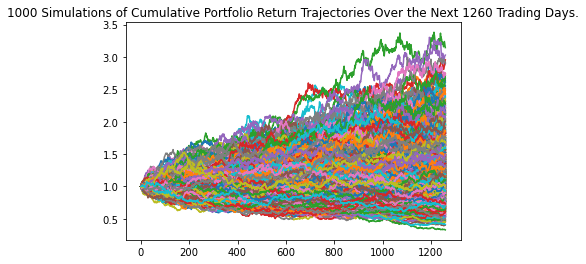

In [112]:
# Plot simulation outcomes
bab_MC_plot = MC_fiveyear.plot_simulation()

In [124]:
# Compute summary statistics from the simulated daily returns
bab_sim_returns = {
    "mean": list(MC_fiveyear.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
bab_df_sim_returns = pd.DataFrame(bab_sim_returns)

# Display sample data
bab_df_sim_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000008,1.000222,0.971473,1.031881
2,1.000375,1.000287,0.955389,1.049486
3,1.000713,1.000898,0.951690,1.065231
4,1.000735,1.000186,0.945475,1.067953


<AxesSubplot:title={'center':'BAB: Simulated Daily Returns'}>

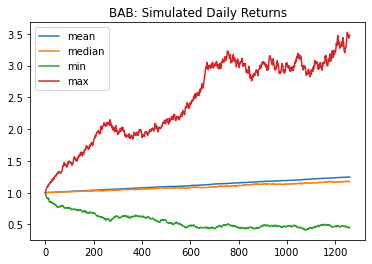

In [114]:
# Plot simulated returns
bab_df_sim_returns.plot(title = "BAB: Simulated Daily Returns")

In [115]:
# Set initial investment
i_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = i_investment * bab_df_sim_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10004.070059,10003.909232,9713.431581,10354.725015
2,10002.500173,10005.567968,9543.629751,10422.936722
3,10005.873884,10003.616127,9512.291293,10588.618869
4,10008.455469,10010.935440,9353.533927,10655.154933


<AxesSubplot:title={'center':'BAB: Simulated Outcomes of an Intial Investment of $10,000'}>

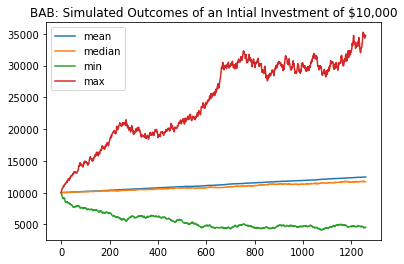

In [116]:
# Plot simulated outcomes
cumulative_pnl.plot(title = "BAB: Simulated Outcomes of an Intial Investment of $10,000")

In [117]:
# Fetch summary statistics from the Monte Carlo simulation results
bab_MC_summary = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(bab_MC_summary)

count           1000.000000
mean               1.253358
std                0.445693
min                0.329600
25%                0.943814
50%                1.179802
75%                1.482758
max                3.143491
95% CI Lower       0.572865
95% CI Upper       2.318620
Name: 1260, dtype: float64


In [118]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
bab_ci_lower = round(bab_MC_summary[8]*10000,2)
bab_ci_upper = round(bab_MC_summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${bab_ci_lower} and ${bab_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $5728.65 and $23186.2.


In [119]:
# Tickers
ticker3 = ["SPY"]

# Set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
spy_df = alpaca.get_barset(
    ticker3,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
spy_df.head(10)

SPY                                      
                             open    high       low    close     volume
time                                                                   
2017-06-05 00:00:00-04:00  243.98  244.30  243.7600  243.965   27596403
2017-06-06 00:00:00-04:00  243.31  243.98  243.1200  243.250   36562468
2017-06-07 00:00:00-04:00  243.60  243.92  242.8300  243.650   38602639
2017-06-08 00:00:00-04:00  243.77  244.33  243.1700  243.760   48051333
2017-06-09 00:00:00-04:00  244.09  245.01  241.9500  243.450  103578275
2017-06-12 00:00:00-04:00  243.14  243.42  242.3800  243.340   57096569
2017-06-13 00:00:00-04:00  243.99  244.61  243.5799  244.520   43470532
2017-06-14 00:00:00-04:00  244.86  244.87  243.2900  244.260   55098826
2017-06-15 00:00:00-04:00  242.68  243.91  242.3600  243.790   51523068
2017-06-16 00:00:00-04:00  242.77  242.83  241.6337  242.630   48998243

In [120]:
# Configure a Monte Carlo simulation to forecast five years daily returns
MC_fiveyear2 = MCSimulation(
    portfolio_data = spy_df,
    num_simulation = 1000,
    num_trading_days = 252*5
)
# Print the simulation input data
MC_fiveyear2.portfolio_data.head()

SPY                                      \
                             open    high     low    close     volume   
time                                                                    
2017-06-05 00:00:00-04:00  243.98  244.30  243.76  243.965   27596403   
2017-06-06 00:00:00-04:00  243.31  243.98  243.12  243.250   36562468   
2017-06-07 00:00:00-04:00  243.60  243.92  242.83  243.650   38602639   
2017-06-08 00:00:00-04:00  243.77  244.33  243.17  243.760   48051333   
2017-06-09 00:00:00-04:00  244.09  245.01  241.95  243.450  103578275   

                                        
                          daily_return  
time                                    
2017-06-05 00:00:00-04:00          NaN  
2017-06-06 00:00:00-04:00    -0.002931  
2017-06-07 00:00:00-04:00     0.001644  
2017-06-08 00:00:00-04:00     0.000451  
2017-06-09 00:00:00-04:00    -0.001272

In [122]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns 
MC_fiveyear2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985066,0.997951,0.986677,0.981647,1.001609,0.990836,0.994678,1.006720,0.980674,0.998676,...,1.019266,0.999735,0.999886,0.994748,1.018768,0.998850,1.025269,1.002356,1.017334,1.021191
2,0.979634,0.990154,0.979765,0.965218,1.024027,1.005049,0.984641,0.984688,1.008772,0.990048,...,1.032939,0.993822,0.990170,0.995976,1.009283,0.989388,1.039405,0.999414,1.017148,1.022757
3,0.957022,1.002201,0.971822,0.954883,1.022108,1.001058,0.957459,0.999751,1.011387,0.997369,...,1.040715,0.997413,1.010524,0.981090,1.002918,0.990207,1.043444,0.990861,1.013742,1.028549
4,0.958186,1.021872,0.969734,0.946356,1.037852,0.997437,0.979925,0.992299,1.010009,0.987633,...,1.050485,0.981953,1.030930,0.981482,1.015667,0.981786,1.042789,0.978996,1.025226,1.015556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.152723,2.408185,2.565000,2.019167,1.937624,1.166581,1.816978,2.608094,1.636051,2.458797,...,1.407545,1.414542,3.343922,0.928645,2.078041,4.619894,1.629335,3.714110,1.085333,1.401918
1257,1.159929,2.387353,2.588857,2.014873,1.905513,1.148233,1.804823,2.667888,1.624478,2.482188,...,1.419038,1.432215,3.456655,0.913869,2.061145,4.569326,1.604314,3.719996,1.088798,1.409724
1258,1.149440,2.383006,2.568456,1.986542,1.909726,1.145675,1.823691,2.692887,1.601314,2.509250,...,1.439401,1.430438,3.513371,0.907934,2.082057,4.555361,1.621610,3.743098,1.052453,1.376539
1259,1.186321,2.389549,2.533781,1.992814,1.922561,1.140567,1.832740,2.632487,1.588908,2.452727,...,1.442406,1.432224,3.536220,0.895307,2.022546,4.528435,1.647208,3.690708,1.061690,1.375060


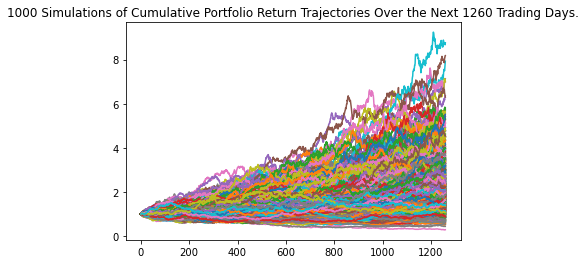

In [123]:
# Plot simulation outcomes
spy_MC_plot = MC_fiveyear2.plot_simulation()

In [125]:
# Compute summary statistics from the simulated daily returns
spy_sim_returns = {
    "mean": list(MC_fiveyear2.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear2.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear2.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear2.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
spy_df_sim_returns = pd.DataFrame(spy_sim_returns)

# Display sample data
bab_df_sim_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000008,1.000222,0.971473,1.031881
2,1.000375,1.000287,0.955389,1.049486
3,1.000713,1.000898,0.951690,1.065231
4,1.000735,1.000186,0.945475,1.067953


<AxesSubplot:title={'center':'SPY: Simulated Daily Returns'}>

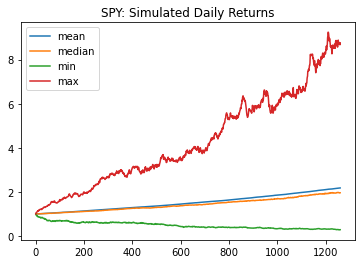

In [126]:
# Plot simulated returns
spy_df_sim_returns.plot(title = "SPY: Simulated Daily Returns")

In [128]:
# Set initial investment
initial_investment2 = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl2 = initial_investment2 * spy_df_sim_returns

# Display sample data
cumulative_pnl2.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,9998.791609,9999.055302,9595.696414,10465.777290
2,10002.969261,10001.503935,9430.987459,10598.352339
3,10007.243109,10004.381795,9406.850292,10709.124660
4,10018.562540,10014.984857,9308.883380,10754.060052


<AxesSubplot:title={'center':'SPY: Simulated Outcomes of an Intial Investment of $10,000'}>

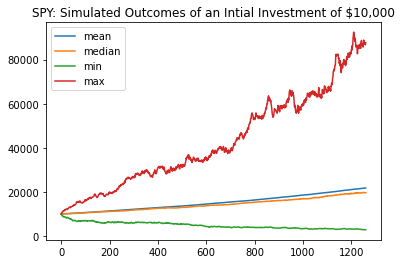

In [129]:
# Plot simulated outcome
cumulative_pnl2.plot(title = "SPY: Simulated Outcomes of an Intial Investment of $10,000")

In [130]:
# Fetch summary statistics from the Monte Carlo simulation results
spy_MC_summary = MC_fiveyear2.summarize_cumulative_return()

# Print summary statistics
print(spy_MC_summary)

count           1000.000000
mean               2.179623
std                1.070558
min                0.286757
25%                1.433860
50%                1.961671
75%                2.655046
max                8.761568
95% CI Lower       0.768024
95% CI Upper       4.820172
Name: 1260, dtype: float64


In [131]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower2 = round(spy_MC_summary[8]*10000,2)
ci_upper2 = round(spy_MC_summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $7680.24 and $48201.72.


In [133]:
# Additional import libs & dependencies
import pandas_ta as ta

<AxesSubplot:>

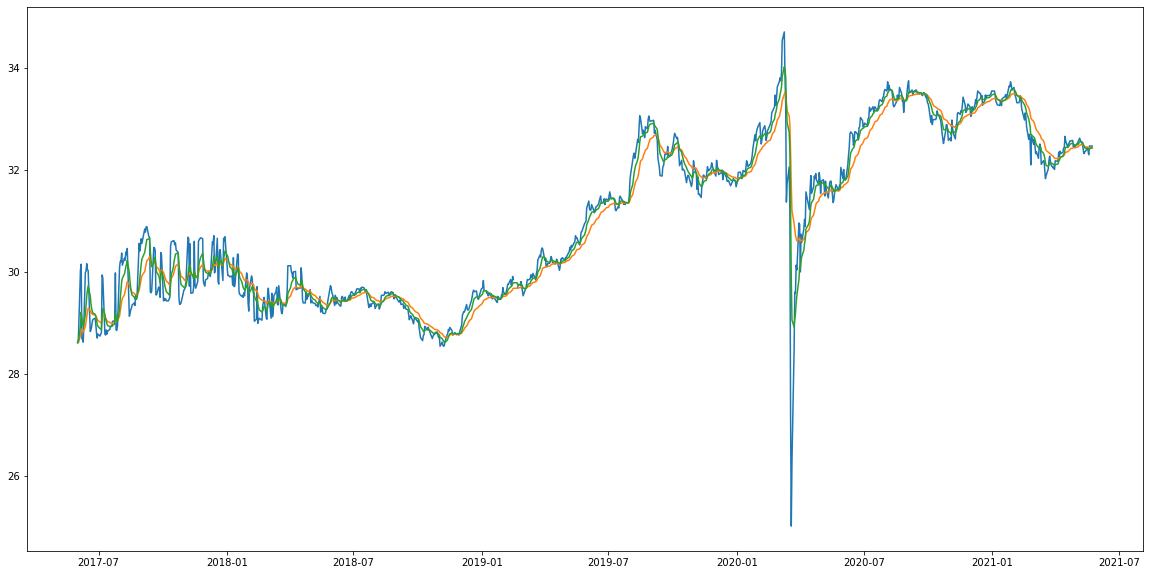

In [135]:
# Calculate 21 & 8 day moving average
bab_21_ema = bab_spy_closing_prices['BAB'].ewm(span=21, adjust=False).mean()
bab_8_ema = bab_spy_closing_prices['BAB'].ewm(span=8, adjust=False).mean()

# Plot 21 & 8 day moving average
bab_spy_closing_prices['BAB'].plot(figsize = (20,10))
bab_21_ema.plot(figsize = (20,10))
bab_8_ema.plot(figsize = (20,10))